<a href="https://colab.research.google.com/github/JeebakZ/Football-Scrapping-/blob/main/Football_Pass_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pwd


/content


In [3]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.2 MB/s eta 0:00:00


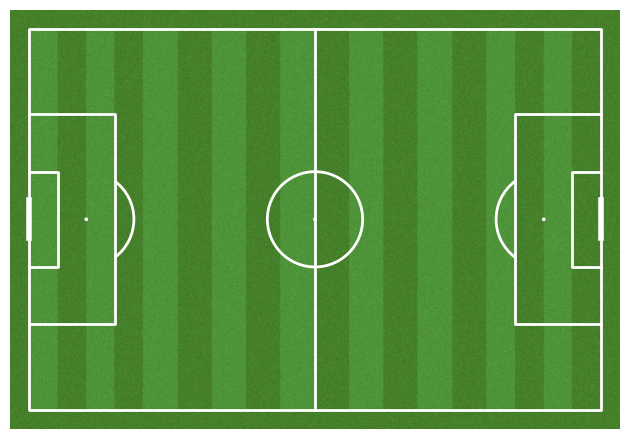

In [4]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
url=input("enter the url:" " ")

enter the url: https://1xbet.whoscored.com/Matches/1809768/Live/Europe-Europa-League-2023-2024-Atalanta-Liverpool


In [7]:
response = requests.get(
    url,
    headers={'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"} # you'll be blocked if you don't use some type of user agent
)

In [8]:
response.status_code

200

In [9]:
soup=BeautifulSoup(response.content,"lxml")
scripts=soup.find_all("script")

In [10]:
scripts

[<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"47235c2cb5","applicationID":"1020190497","transactionName":"MVBVZhMHDEcCV0BdCwgadmExSRRdBkNHGwkHQVRaBBVNWQJAV1wHA1tDQARIA0cTTA==","queueTime":0,"applicationTime":530,"agent":"","atts":""}</script>,
 <script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"47235c2cb5",applicationID:"1020190497"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(arguments))

In [11]:
strings=scripts[22].string
strings

'\r\n        require.config.params["args"] = {\r\n            matchId:1809768,\r\n            matchCentreData: {"playerIdNameDictionary":{"100962":"Berat Djimsiti","126278":"Juan Musso","386390":"Charles De Ketelaere","110260":"Sead Kolasinac","362556":"Éderson","129903":"Mario Pasalic","356176":"Michel Adopo","402046":"Matteo Ruggeri","432552":"Giovanni Bonfanti","64075":"Rafael Tolói","78693":"Francesco Rossi","383278":"Marco Carnesecchi","141312":"Davide Zappacosta","302650":"Gianluca Scamacca","391527":"El Bilal Touré","343308":"Teun Koopmeiners","352830":"Mitchel Bakker","85070":"Marten de Roon","135890":"Hans Hateboer","299451":"Ademola Lookman","129354":"Aleksey Miranchuk","454908":"Isak Hien","418579":"Emil Holm","345319":"Alexis Mac Allister","114147":"Alisson Becker","377168":"Luis Díaz","108226":"Mohamed Salah","345957":"Ibrahima Konaté","301455":"Kostas Tsimikas","369875":"Dominik Szoboszlai","322176":"Caoimhín Kelleher","86829":"Wataru Endo","95408":"Virgil van Dijk","3638

In [12]:
ind_start=strings.index("matchCentreData:")+17
ind_end=strings.index(",\r\n            matchCentreEventTypeJson")

In [13]:
jason_data=strings[ind_start:ind_end]

In [14]:
data=json.loads(jason_data)

In [15]:
events=data["events"]

In [16]:
df=pd.DataFrame(events)

In [17]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,cardType
0,2.674468e+09,2,0,0.0,300,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.674468e+09,2,0,0.0,26,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.674468e+09,3,0,0.0,26,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.674468e+09,4,0,3.0,26,26.9,54.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,92.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.674468e+09,3,0,6.0,300,32.0,9.2,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2.674500e+09,1101,93,15.0,26,0.0,0.0,96,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,2.674500e+09,1102,0,0.0,26,0.0,0.0,6,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,2.674500e+09,738,0,0.0,300,0.0,0.0,6,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640,2.674455e+09,1,0,0.0,26,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,cardType
0,2.674468e+09,2,0,0.0,300,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.674468e+09,2,0,0.0,26,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.674468e+09,3,0,0.0,26,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.674468e+09,4,0,3.0,26,26.9,54.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,92.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.674468e+09,3,0,6.0,300,32.0,9.2,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# create function for cleaning
def clean_data(x):
    x1=x.apply(lambda x:str(x))
    x2=x1.str.split(":",n=3,expand=True)[2]
    x3=x2.str.replace("[^a-zA-Z0-9]",'',regex=True)
    return x3

In [20]:
# for period ,type
df["period"]=clean_data(df["period"])
df["type"]=clean_data(df["type"])
df["outcomeType"]=clean_data(df["outcomeType"])

In [21]:
df1=df[["id","eventId","minute","second","teamId","x","y","endX","endY","period","type","outcomeType","playerId"]]

In [22]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,cardType
0,2.674468e+09,2,0,0.0,300,0.0,0.0,0,FirstHalf,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.674468e+09,2,0,0.0,26,0.0,0.0,0,FirstHalf,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.674468e+09,3,0,0.0,26,50.0,50.0,0,FirstHalf,Pass,...,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.674468e+09,4,0,3.0,26,26.9,54.4,0,FirstHalf,Pass,...,92.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.674468e+09,3,0,6.0,300,32.0,9.2,0,FirstHalf,Aerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2.674500e+09,1101,93,15.0,26,0.0,0.0,96,SecondHalf,End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,2.674500e+09,1102,0,0.0,26,0.0,0.0,6,PostGame,End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,2.674500e+09,738,0,0.0,300,0.0,0.0,6,PostGame,End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640,2.674455e+09,1,0,0.0,26,0.0,0.0,0,PreMatch,FormationSet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Save the DataFrame to a CSV file
df.to_csv('atlanta-liverpool_3-0_passxy.csv', index=False)

In [24]:
from google.colab import files

files.download('atlanta-liverpool_3-0_passxy.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#PLAYER NAME
player_data=data["playerIdNameDictionary"]

In [ ]:
player_data=pd.Series(player_data)

In [ ]:
player_data=pd.DataFrame(player_data)

In [ ]:
player_data.reset_index(inplace=True)

In [ ]:
player_data.columns=["playerId","playername"]

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements